In [1]:
import pandas as pd
import scanpy as sc

In [2]:
adata = sc.read_h5ad("./output/adata_v2.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 2730 × 1000
    obs: 'paul15_clusters', 'n_counts_all', 'louvain', 'louvain_anno', 'cell_type', 'dpt_pseudotime'
    var: 'n_counts', 'mean', 'std'
    uns: 'cell_type_colors', 'dendrogram_cell_type', 'diffmap_evals', 'draw_graph', 'iroot', 'log1p', 'louvain', 'louvain_anno_colors', 'louvain_anno_sizes', 'louvain_colors', 'louvain_sizes', 'neighbors', 'paga', 'paul15_clusters_colors', 'pca', 'tsne'
    obsm: 'X_diffmap', 'X_draw_graph_fa', 'X_pca', 'X_tsne'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

### Read the transition indicies
---

In [4]:
def read_tab_separated_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
    data = []
    for line in lines:
        # Strip any surrounding whitespace and split by tabs
        numbers = line.strip().split(', ')
        # Convert the strings to integers or floats
        numbers = [str(int(num)) for num in numbers]
        data.append(numbers)
    
    return data

transition_indicies_filepath = './data/transition_indices.txt'
data_cell_indicies = read_tab_separated_file(transition_indicies_filepath)


In [5]:
data_cell_indicies[0]

['56',
 '233',
 '266',
 '998',
 '1156',
 '1379',
 '1497',
 '1659',
 '2063',
 '2266',
 '2315',
 '2464',
 '2637']

### Read the cell pairs file

In [6]:
def read_tab_separated_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
    data = []
    for line in lines:
        # Strip any surrounding whitespace and split by tabs
        cells = line.strip().split(', ')
        # Convert the strings to integers or floats
        cells = [str(cell) for cell in cells]
        data.append(cells)
    
    return data

cell_pairs_filepath = './data/cell_pairs.txt'
data_cell_pairs = read_tab_separated_file(cell_pairs_filepath)

In [7]:
data_cell_pairs

[['Ery0', 'Ery1'],
 ['Ery1', 'Ery3'],
 ['HPC', 'Monocyte Progenitor'],
 ['Ery3', 'Ery4'],
 ['HPC', 'Monocyte Progenitor', 'Neutrophils'],
 ['Ery0', 'Ery2', 'Ery3', 'Ery4'],
 ['Ery0', 'Ery4'],
 ['Monocyte Progenitor', 'Neutrophils'],
 ['Early Progenitor', 'HPC'],
 ['HPC', 'Neutrophils'],
 ['Early Progenitor', 'Ery4'],
 ['Ery4', 'Mep'],
 ['Ery0', 'Ery2', 'Ery4'],
 ['Ery0', 'Ery3', 'Ery4'],
 ['Basophil', 'HPC'],
 ['Basophil', 'Neutrophils'],
 ['Ery4', 'HPC', 'Neutrophils'],
 ['Ery2', 'Ery4'],
 ['Ery0', 'Mep'],
 ['Ery0', 'HPC', 'Neutrophils'],
 ['Basophil', 'HPC', 'Neutrophils'],
 ['HPC', 'Lymph'],
 ['Ery0', 'HPC', 'Monocyte Progenitor', 'Neutrophils'],
 ['Ery0', 'Ery3'],
 ['Ery0', 'HPC'],
 ['Ery0', 'Monocyte Progenitor', 'Neutrophils'],
 ['DC', 'HPC']]

In [8]:
for idx in range(len(data_cell_indicies)):
    if len(data_cell_indicies[idx]) > 7:
        print(f"idx: {data_cell_indicies[idx]}")
        print(f"hyb: {data_cell_pairs[idx]}")
        print("---"*30)

idx: ['56', '233', '266', '998', '1156', '1379', '1497', '1659', '2063', '2266', '2315', '2464', '2637']
hyb: ['Ery0', 'Ery1']
------------------------------------------------------------------------------------------
idx: ['195', '304', '1042', '1178', '1201', '1765', '1976', '2272', '2562']
hyb: ['Ery1', 'Ery3']
------------------------------------------------------------------------------------------
idx: ['242', '713', '2560', '1008', '2017', '2569', '1494', '1977', '2598', '1735', '2635', '2170', '2183', '64', '112', '523', '904', '1369', '1437', '1505', '1678', '2609', '2706']
hyb: ['Ery0', 'Ery4']
------------------------------------------------------------------------------------------
idx: ['265', '2599', '2642', '183', '2555', '410', '509', '567', '1283', '2347']
hyb: ['Monocyte Progenitor', 'Neutrophils']
------------------------------------------------------------------------------------------
idx: ['899', '2196', '2404', '1642', '2048', '2076', '583', '1547', '620', '2596'

Here we have a large set of cells for >7 for These cell Hybrids, Plot only those:
- Ery0-Ery1
- Ery1-Ery3
- Ery0-Ery4
- Monocyte Progenitor-Neutrophils
- HPC-Neutrophils

### Make a copy of cell_type column in obs dataframe and name it as cell_type_w_hybrids

In [9]:
adata.obs

,paul15_clusters,n_counts_all,louvain,louvain_anno,cell_type,dpt_pseudotime
0,7MEP,353.0,8,8,Ery4,0.225547
1,15Mo,2556.0,1,1,Monocyte Progenitor,0.273524
2,3Ery,4649.0,17,17,Ery0,0.710179
3,15Mo,4486.0,2,2,Neutrophils,0.267904
4,3Ery,5205.0,17,17,Ery0,0.781939
...,...,...,...,...,...,...
2725,2Ery,4873.0,6,6,Ery1,0.649140
2726,13Baso,3553.0,24,24/Mo,Monocyte Progenitor,0.298521
2727,7MEP,443.0,8,8,Ery4,0.196117
2728,15Mo,3252.0,2,2,Neutrophils,0.264164


In [10]:
adata.obs["cell_type_w_hybrids"] = adata.obs['cell_type']

In [11]:
assert len(data_cell_indicies) == len(data_cell_pairs)

In [12]:
for idx in range(len(data_cell_indicies)):
    indices = data_cell_indicies[idx]
    cell_types = data_cell_pairs[idx]
    cell_type_name_hyb = "-".join(cell_types) + "-Hybrid"
    adata.obs['cell_type_w_hybrids'].cat.add_categories(cell_type_name_hyb, inplace=True)
    # Rename the cell_type for the given indices to 'xyz'
    adata.obs.loc[indices, 'cell_type_w_hybrids'] = cell_type_name_hyb

/usr/local/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.add_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [13]:
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import rc_context

In [14]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
# low dpi (dots per inch) yields small inline figures
sc.settings.set_figure_params(dpi=200, frameon=False, figsize=(3, 3), facecolor="white", color_map="viridis_r")

-----
anndata     0.8.0
scanpy      1.9.3
-----
PIL                 9.5.0
anyio               NA
arrow               1.2.3
attr                23.2.0
babel               2.14.0
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cached_property     1.5.2
certifi             2024.07.04
cffi                1.15.1
charset_normalizer  3.3.2
cycler              0.10.0
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.7.0
decorator           5.1.1
defusedxml          0.7.1
entrypoints         0.4
fastjsonschema      NA
fqdn                NA
h5py                3.8.0
idna                3.7
igraph              0.10.8
importlib_resources NA
ipykernel           6.16.2
ipython_genutils    0.2.0
isoduration         NA
jedi                0.19.1
jinja2              3.1.4
joblib              1.3.2
json5               NA
jsonpointer         3.0.0
jsonschema          4.17.3
jupyter_server      1.24.0
jupyterlab_server   2.24.0
kiwisolver          1.4.5


In [15]:
adata_raw = sc.datasets.paul15()

/usr/local/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


In [16]:
adata_raw.obs = adata.obs

In [17]:
del adata

In [18]:
adata_raw.obs

,paul15_clusters,n_counts_all,louvain,louvain_anno,cell_type,dpt_pseudotime,cell_type_w_hybrids
0,7MEP,353.0,8,8,Ery4,0.225547,Ery4
1,15Mo,2556.0,1,1,Monocyte Progenitor,0.273524,Monocyte Progenitor
2,3Ery,4649.0,17,17,Ery0,0.710179,Ery0
3,15Mo,4486.0,2,2,Neutrophils,0.267904,Neutrophils
4,3Ery,5205.0,17,17,Ery0,0.781939,Ery0
...,...,...,...,...,...,...,...
2725,2Ery,4873.0,6,6,Ery1,0.649140,Ery1
2726,13Baso,3553.0,24,24/Mo,Monocyte Progenitor,0.298521,Monocyte Progenitor
2727,7MEP,443.0,8,8,Ery4,0.196117,Ery4
2728,15Mo,3252.0,2,2,Neutrophils,0.264164,Neutrophils


### 1. DGE Ery0-Ery1-Hybrids

In [19]:
filtered_adata = adata_raw[adata_raw.obs["cell_type_w_hybrids"].isin([ "Ery0", "Ery1","Ery0-Ery1-Hybrid"])]

In [20]:
sc.pp.log1p(filtered_adata)

/usr/local/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:373: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [21]:
# Obtain cluster-specific differentially expressed genes
sc.tl.rank_genes_groups(filtered_adata,
                        groupby="cell_type_w_hybrids",
                        method="wilcoxon",
                        )

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [22]:
result = filtered_adata.uns["rank_genes_groups"]
groups = result["names"].dtype.names
top10_dge = pd.DataFrame(
    {
        group + "_" + key[:1]: result[key][group]
        for group in groups
        for key in ["names", "pvals"]
    }
).head(10)
top10_dge.to_csv("./output/DGE/1_Ery0-Ery1-Hybrid/top10_dge.csv")
top10_dge

,Ery0_n,Ery0_p,Ery1_n,Ery1_p,Ery0-Ery1-Hybrid_n,Ery0-Ery1-Hybrid_p
0,Ctse,5.654266e-48,H2afy,2.304377e-17,Psmb8,0.000073
1,Hba-a2,4.382918e-32,Psmb8,4.443732e-12,Tagln2,0.000134
2,Fam132a,2.492819e-28,Afmid,1.771853e-11,Mthfd1,0.000198
3,Prdx2,5.740720e-26,S100a10,4.878954e-11,Rcc2,0.000374
4,Hemgn,9.863917e-24,Cyba,1.414020e-10,Fam168b,0.000377
5,Hmbs,4.398744e-23,Ass1,1.424541e-10,Mt2,0.000540
6,Fth1,6.615728e-23,Arhgdib,1.795929e-09,Polr2e,0.000639
7,Rhd,6.590888e-22,Myb,3.230382e-09,Bzw2,0.000799
8,Isg20,7.034340e-21,Ccnd2,5.400148e-09,Isyna1,0.001090
9,Tmem14c,1.805704e-20,Apoe,2.770607e-08,Acin1,0.001165


In [23]:
Ery0_top10 = sc.get.rank_genes_groups_df(filtered_adata, group="Ery0").head(10)
Ery0_top10.to_csv("./output/DGE/1_Ery0-Ery1-Hybrid/Ery0_top10.csv")
Ery0_top10.head(5)

,names,scores,logfoldchanges,pvals,pvals_adj
0,Ctse,14.552215,1.845779,5.654266e-48,1.951287e-44
1,Hba-a2,11.790239,3.284893,4.382918e-32,7.562726e-29
2,Fam132a,11.038455,0.769678,2.492819e-28,2.867573e-25
3,Prdx2,10.538500,0.647413,5.740720e-26,4.952806e-23
4,Hemgn,10.042989,1.470102,9.863917e-24,6.808075e-21


In [24]:
Ery1_top10 = sc.get.rank_genes_groups_df(filtered_adata, group="Ery1").head(10)
Ery1_top10.to_csv("./output/DGE/1_Ery0-Ery1-Hybrid/Ery1_top10.csv")
Ery1_top10.head(5)

,names,scores,logfoldchanges,pvals,pvals_adj
0,H2afy,8.477322,0.888757,2.304377e-17,5.680290e-15
1,Psmb8,6.922298,1.070485,4.443732e-12,5.111773e-10
2,Afmid,6.723685,0.791101,1.771853e-11,1.747047e-09
3,S100a10,6.574584,1.330106,4.878954e-11,4.677020e-09
4,Cyba,6.414375,1.179359,1.414020e-10,1.229023e-08


In [25]:
Ery0_Ery1_Hybrid_top10 = sc.get.rank_genes_groups_df(filtered_adata, group="Ery0-Ery1-Hybrid").head(5)
Ery0_Ery1_Hybrid_top10.to_csv("./output/DGE/1_Ery0-Ery1-Hybrid/Ery0-Ery1-Hybrid_top10.csv")
Ery0_Ery1_Hybrid_top10.head(5)

,names,scores,logfoldchanges,pvals,pvals_adj
0,Psmb8,3.967920,1.719953,0.000073,0.228095
1,Tagln2,3.819752,1.193529,0.000134,0.228095
2,Mthfd1,3.721190,0.942493,0.000198,0.228095
3,Rcc2,3.558008,0.761981,0.000374,0.260487
4,Fam168b,3.555398,1.435032,0.000377,0.260487


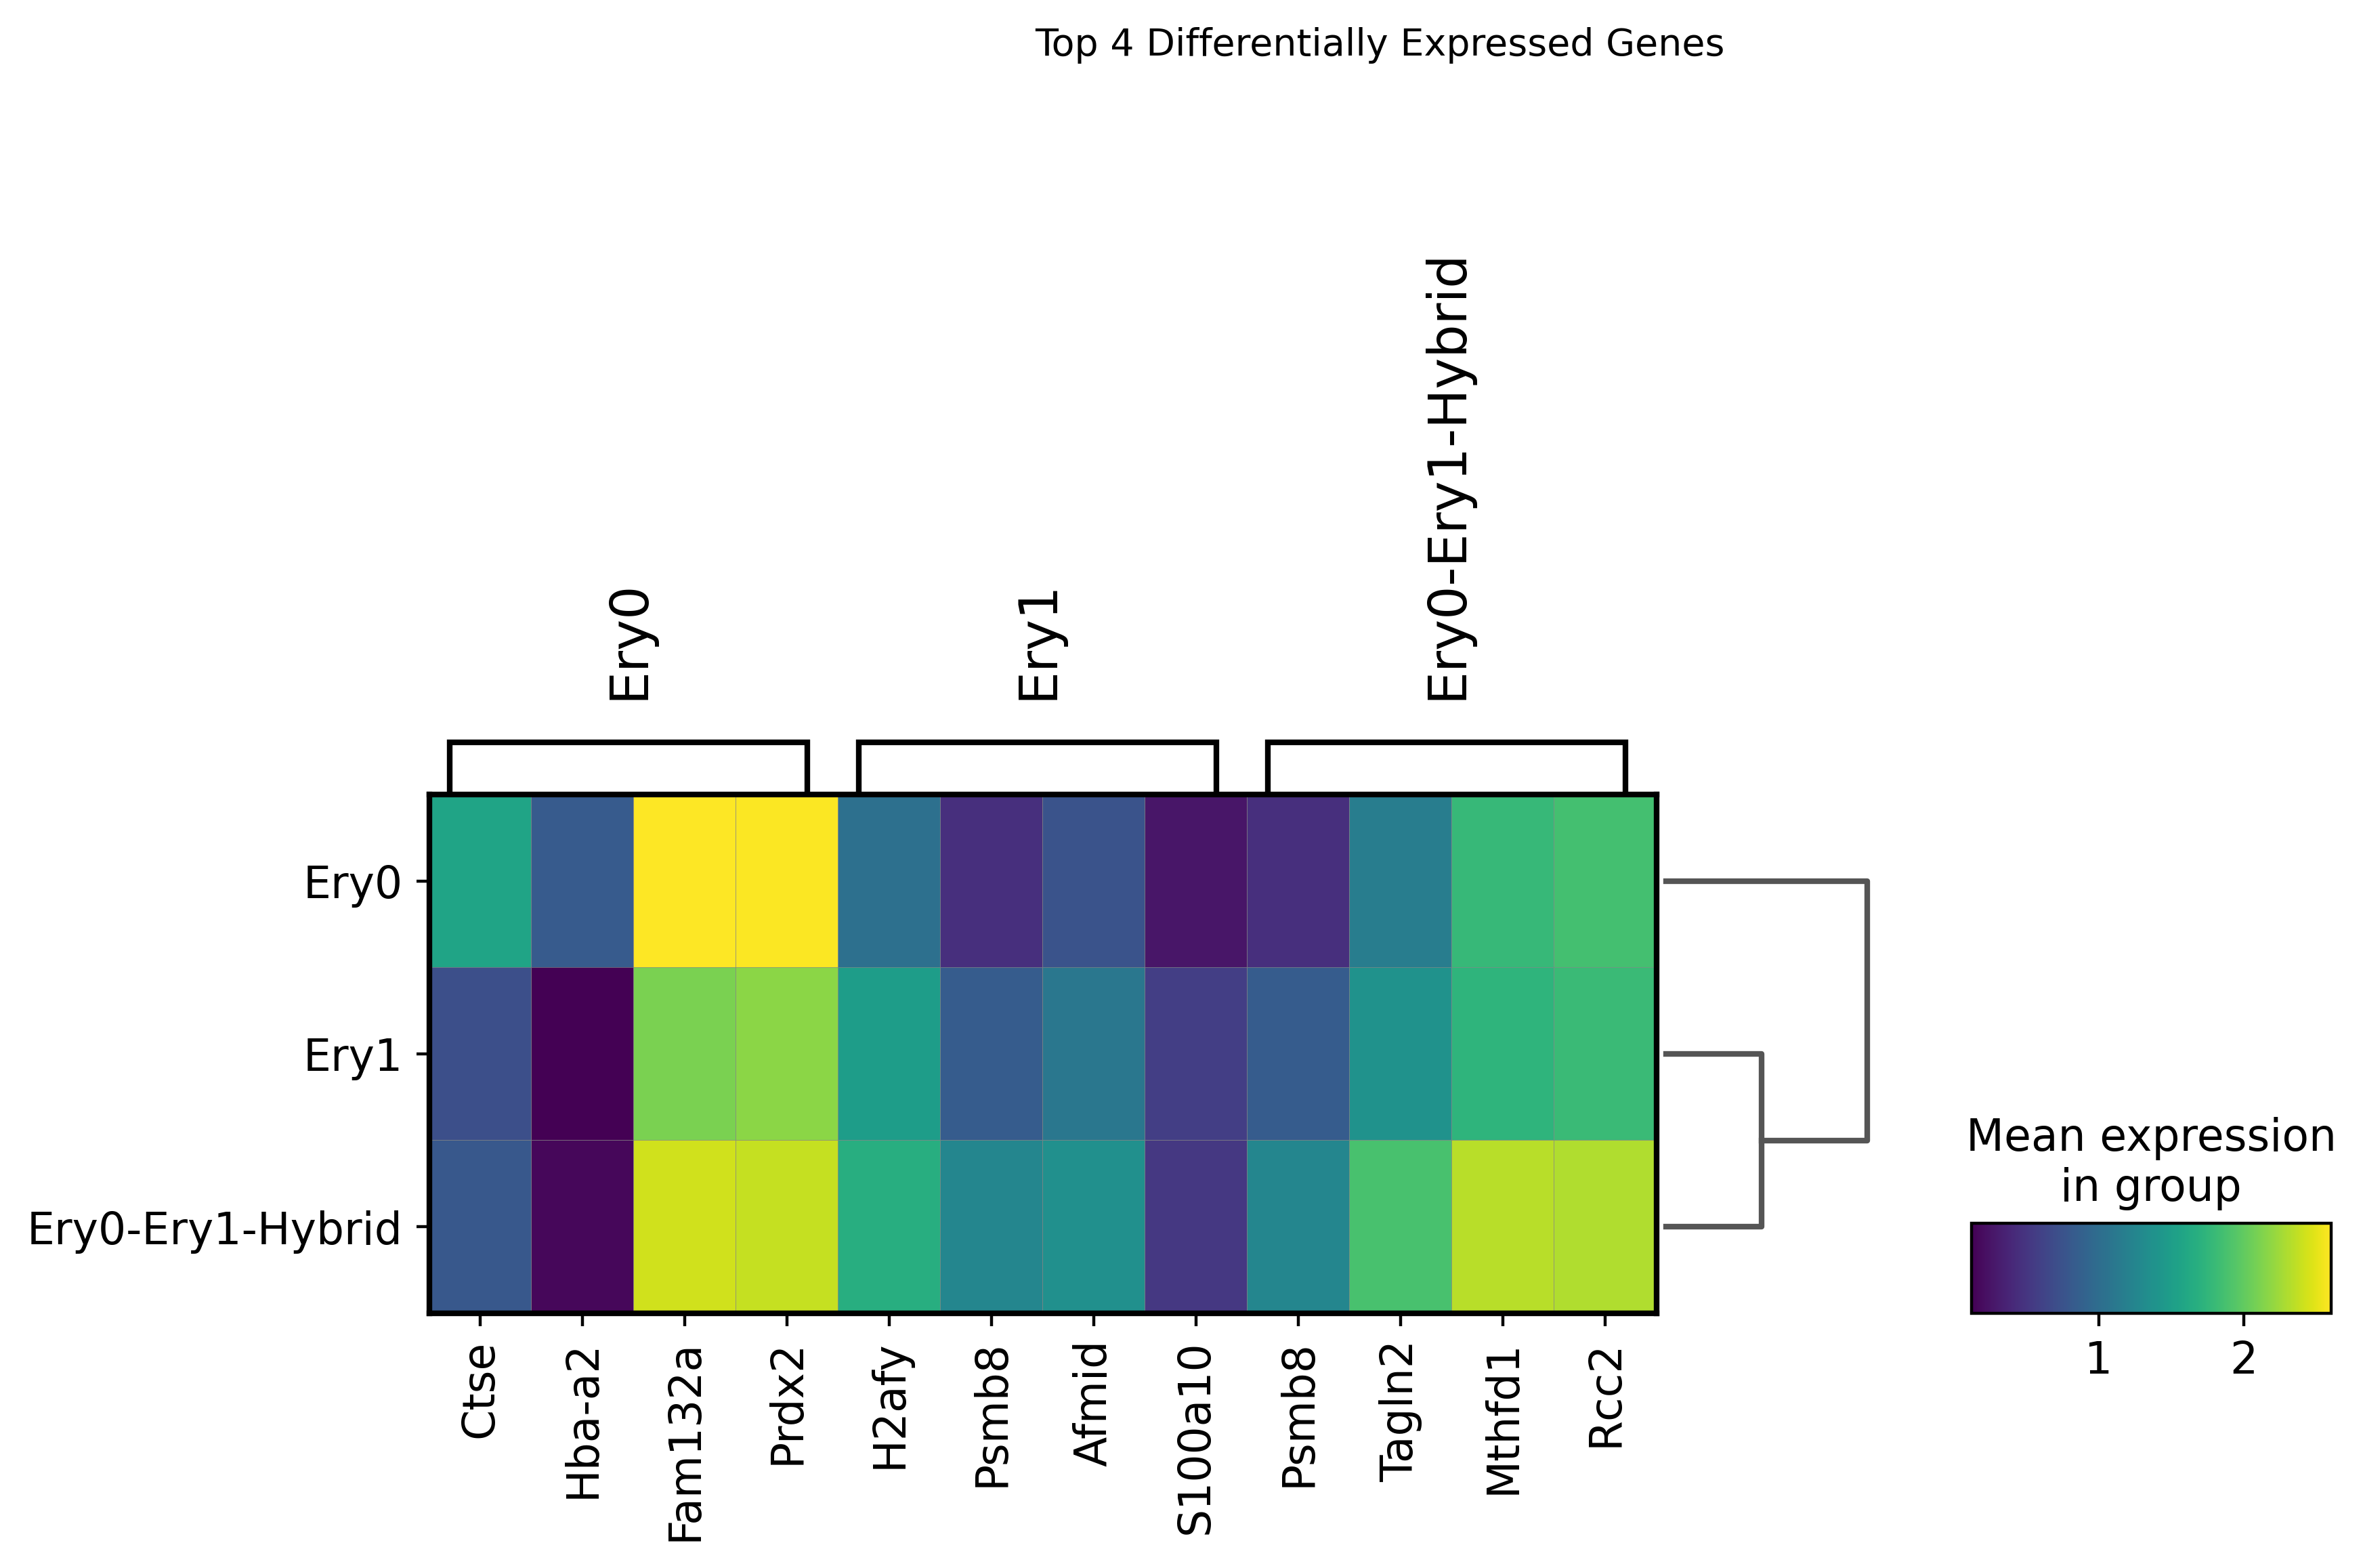

In [47]:
import matplotlib.pyplot as plt
# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (9, 6),
    "xtick.labelsize": 2,
    "ytick.labelsize": 2,
    "axes.labelsize": 2,  # Font size for axis labels
    "axes.titlesize": 4   # Font size for titles
}):
    # Generate the matrix plot and get the figure and axis objects
    fig, ax = plt.subplots()
    sc.pl.rank_genes_groups_matrixplot(
        filtered_adata,
        n_genes=4,
        ax=ax,
        show=False  # Do not show the plot immediately
    )
    
    # Customize the plot further using matplotlib
    ax.set_title("Top 4 Differentially Expressed Genes", fontsize=10)
    ax.set_xlabel("Cell Types/Clusters", fontsize=4)
    ax.set_ylabel("Genes", fontsize=4)
    
    # Optionally customize the tick parameters
    ax.tick_params(axis='x', labelsize=4, rotation=45)
    ax.tick_params(axis='y', labelsize=4)
    
    # Save the plot
    plt.savefig("./output/DGE/1_Ery0-Ery1-Hybrid/matrixplot.png",bbox_inches='tight')
    plt.show()


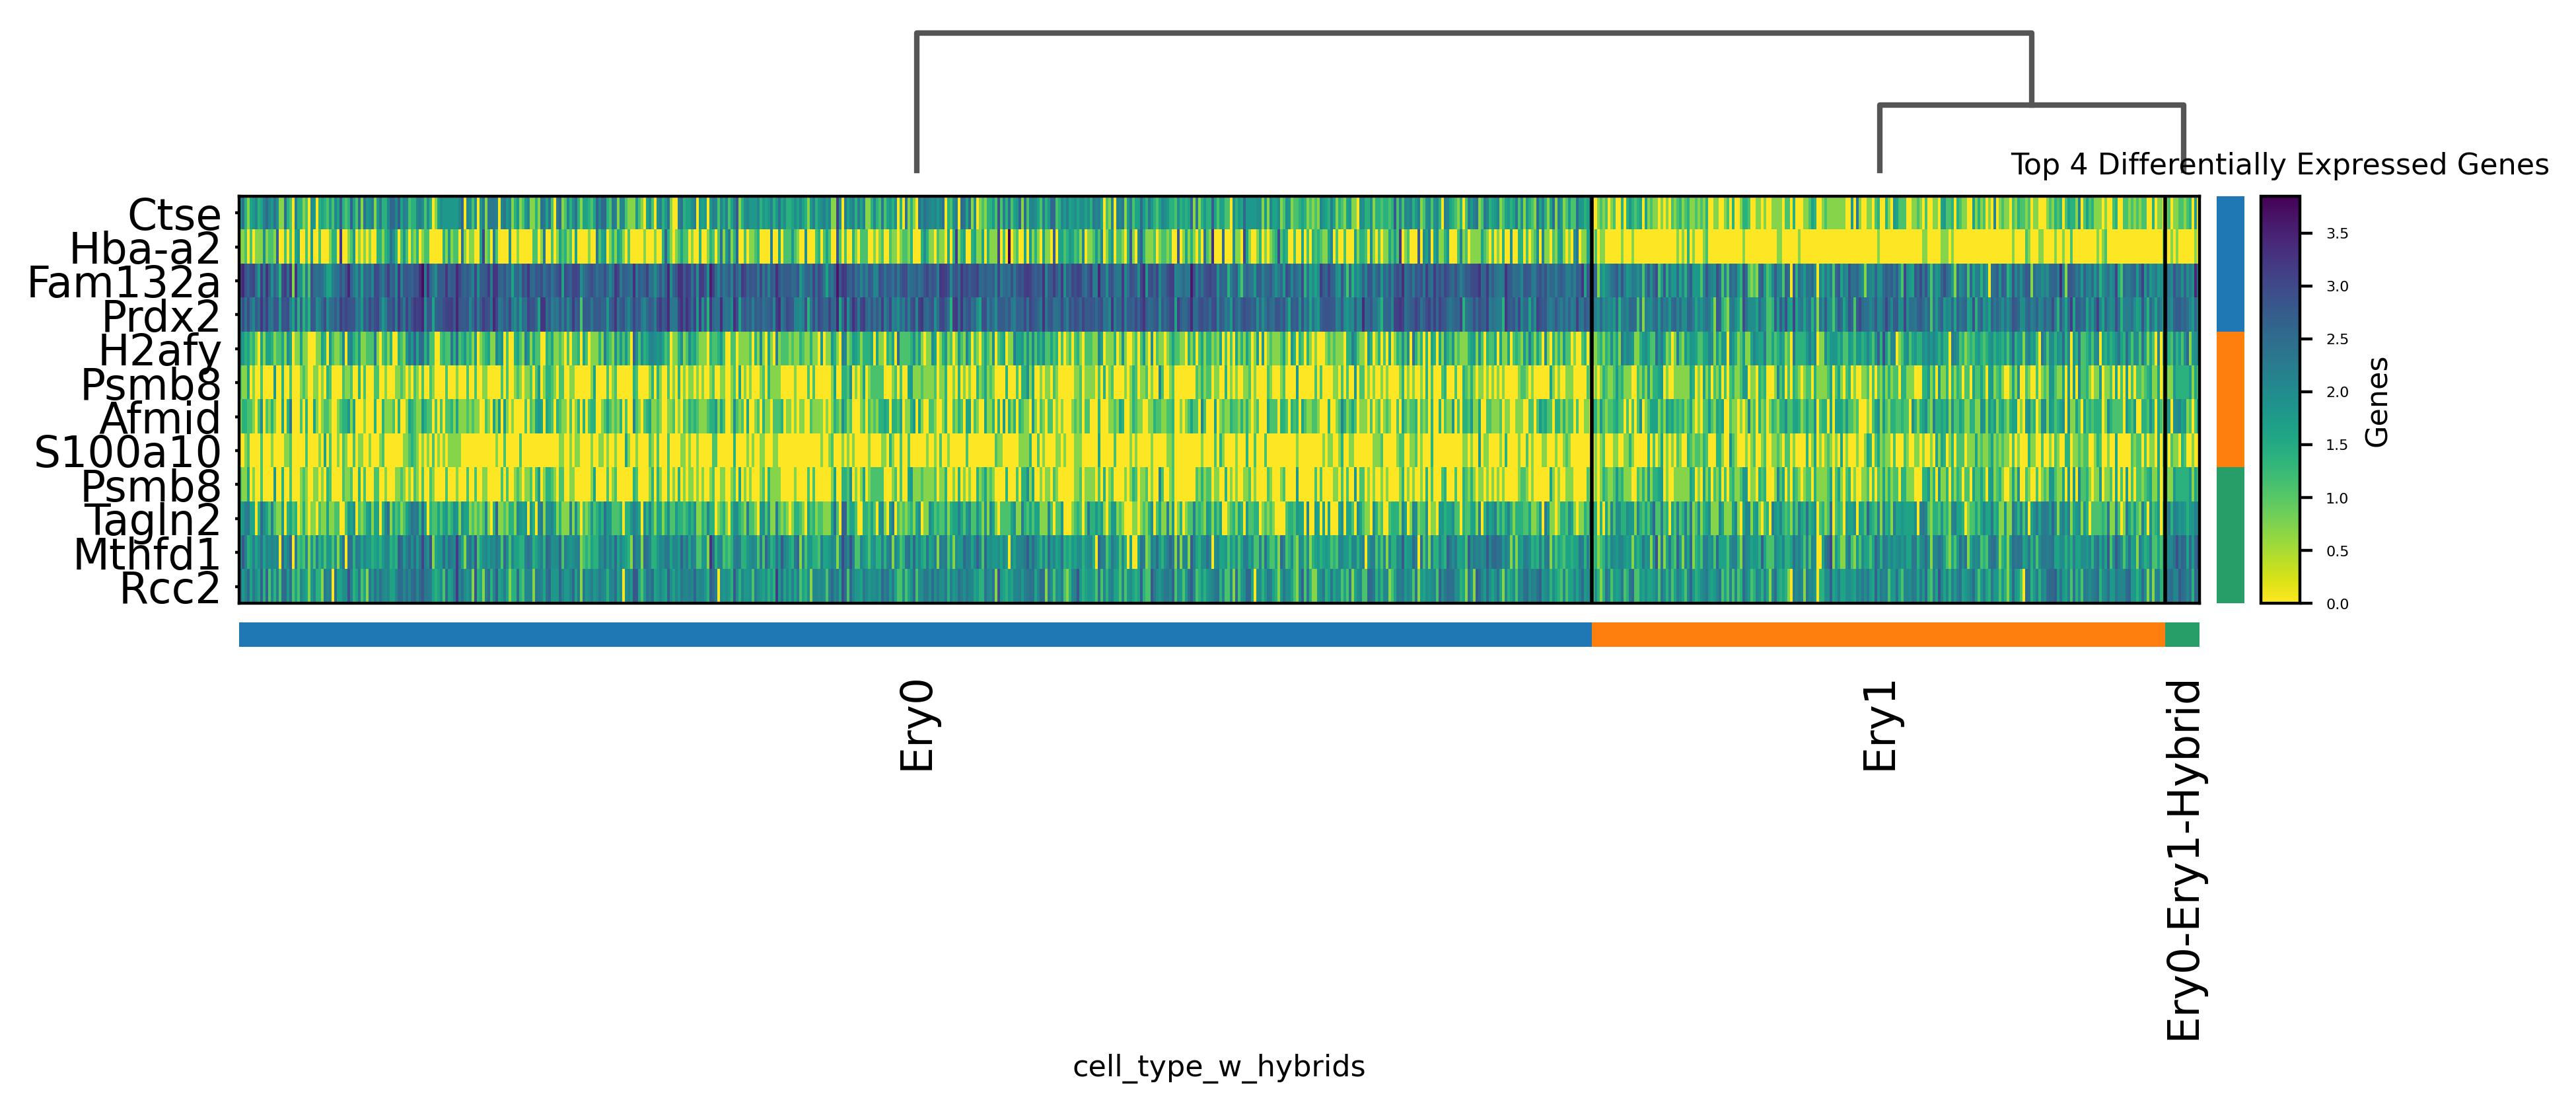

In [48]:
import matplotlib.pyplot as plt
# Set the figure size and font sizes for tick labels, axis labels, and titles
# Set the figure size and font sizes for tick labels, axis labels, and titles
# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (9, 6),
    "xtick.labelsize": 2,
    "ytick.labelsize": 2,
    "axes.labelsize": 8,  # Font size for axis labels
    "axes.titlesize": 8   # Font size for titles
}):
    # Generate the heatmap plot without specifying ax
    sc.pl.rank_genes_groups_heatmap(
        filtered_adata,
        n_genes=4,
        swap_axes=True,
        show=False,  # Do not show the plot immediately
    )

    # Get the current figure and axis
    fig = plt.gcf()
    ax = plt.gca()
    
    # Customize the plot further using matplotlib
    ax.set_title("Top 4 Differentially Expressed Genes", fontsize=8)
    ax.set_xlabel("Cell Types/Clusters", fontsize=16)
    ax.set_ylabel("Genes", fontsize=8)
    
    # Optionally customize the tick parameters
    ax.tick_params(axis='x', labelsize=3, rotation=90)
    ax.tick_params(axis='y', labelsize=4)
    
    # Save the plot
    plt.savefig("./output/DGE/1_Ery0-Ery1-Hybrid/heatmap.png",bbox_inches='tight')
    plt.show()


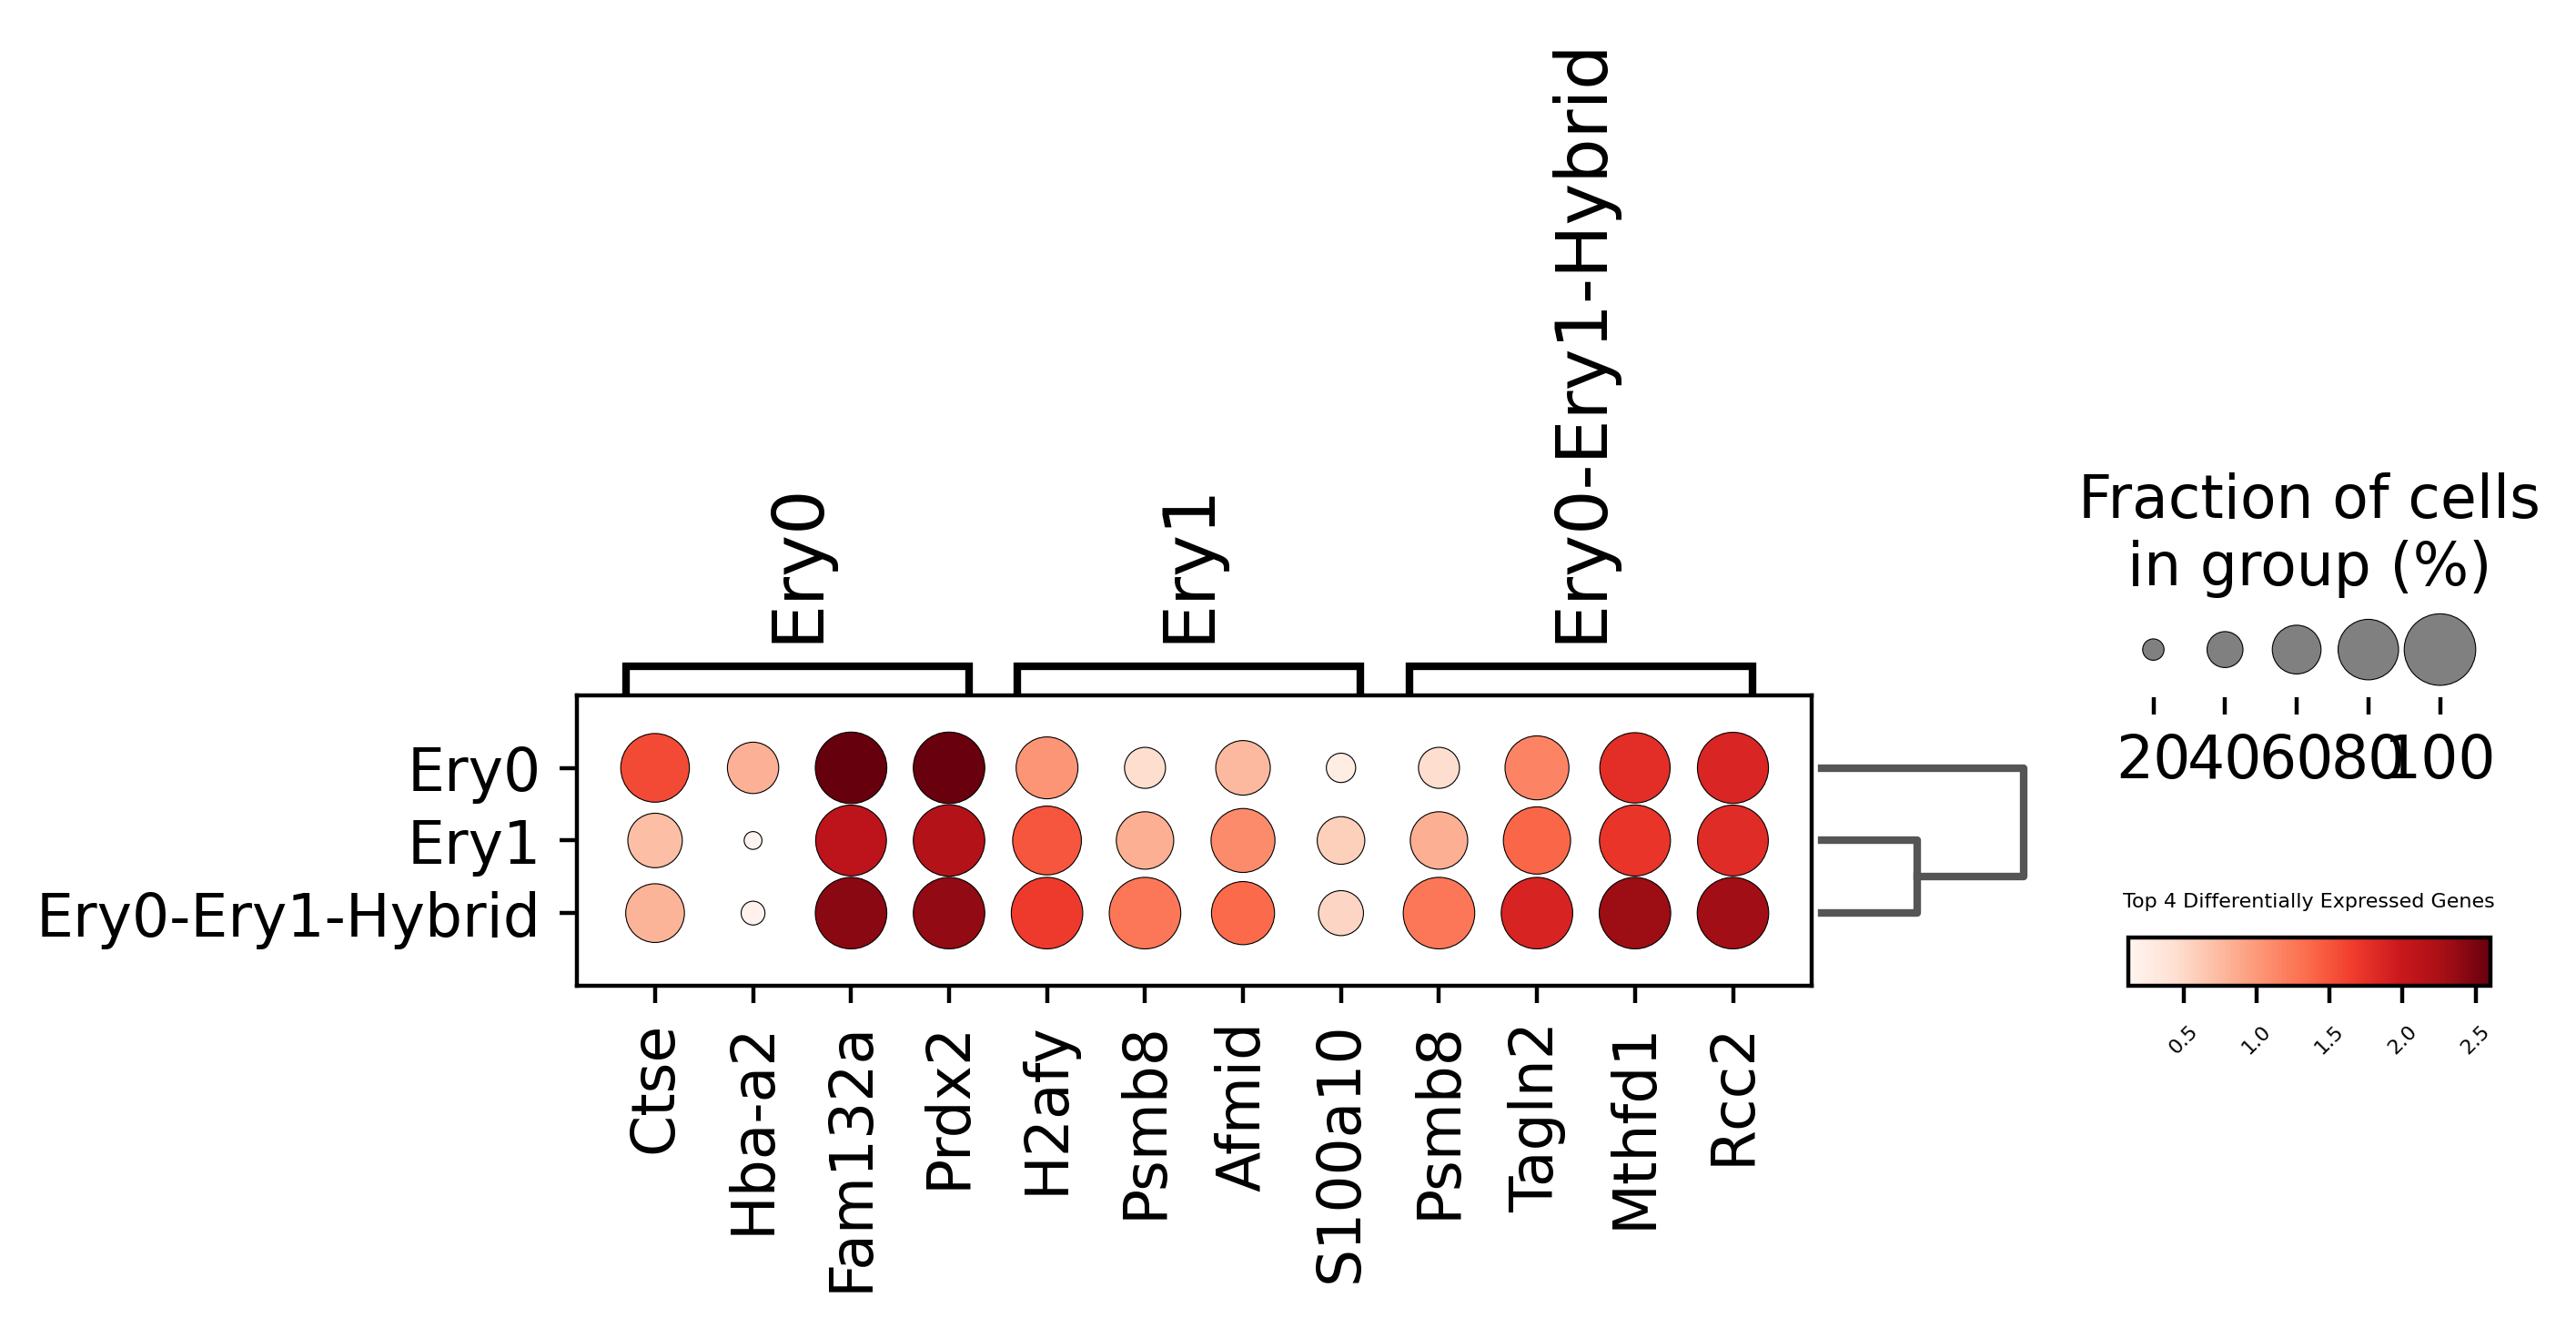

In [49]:
# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (9, 6),
    "xtick.labelsize": 2,
    "ytick.labelsize": 2,
    "axes.labelsize": 2,  # Font size for axis labels
    "axes.titlesize": 4   # Font size for titles
}):
    # Generate the heatmap plot without specifying ax
    sc.pl.rank_genes_groups_dotplot(
        filtered_adata,
        show=False,
        n_genes=4,
)

    # Get the current figure and axis
    fig = plt.gcf()
    ax = plt.gca()
    
    # Customize the plot further using matplotlib
    ax.set_title("Top 4 Differentially Expressed Genes", fontsize=4)
    ax.set_ylabel("Genes", fontsize=4)
    
    # Optionally customize the tick parameters
    ax.tick_params(axis='x', labelsize=4, rotation=45)
    ax.tick_params(axis='y', labelsize=4)
    
    # Save the plot
    plt.savefig("./output/DGE/1_Ery0-Ery1-Hybrid/dotplot.png",bbox_inches='tight')
    plt.show()

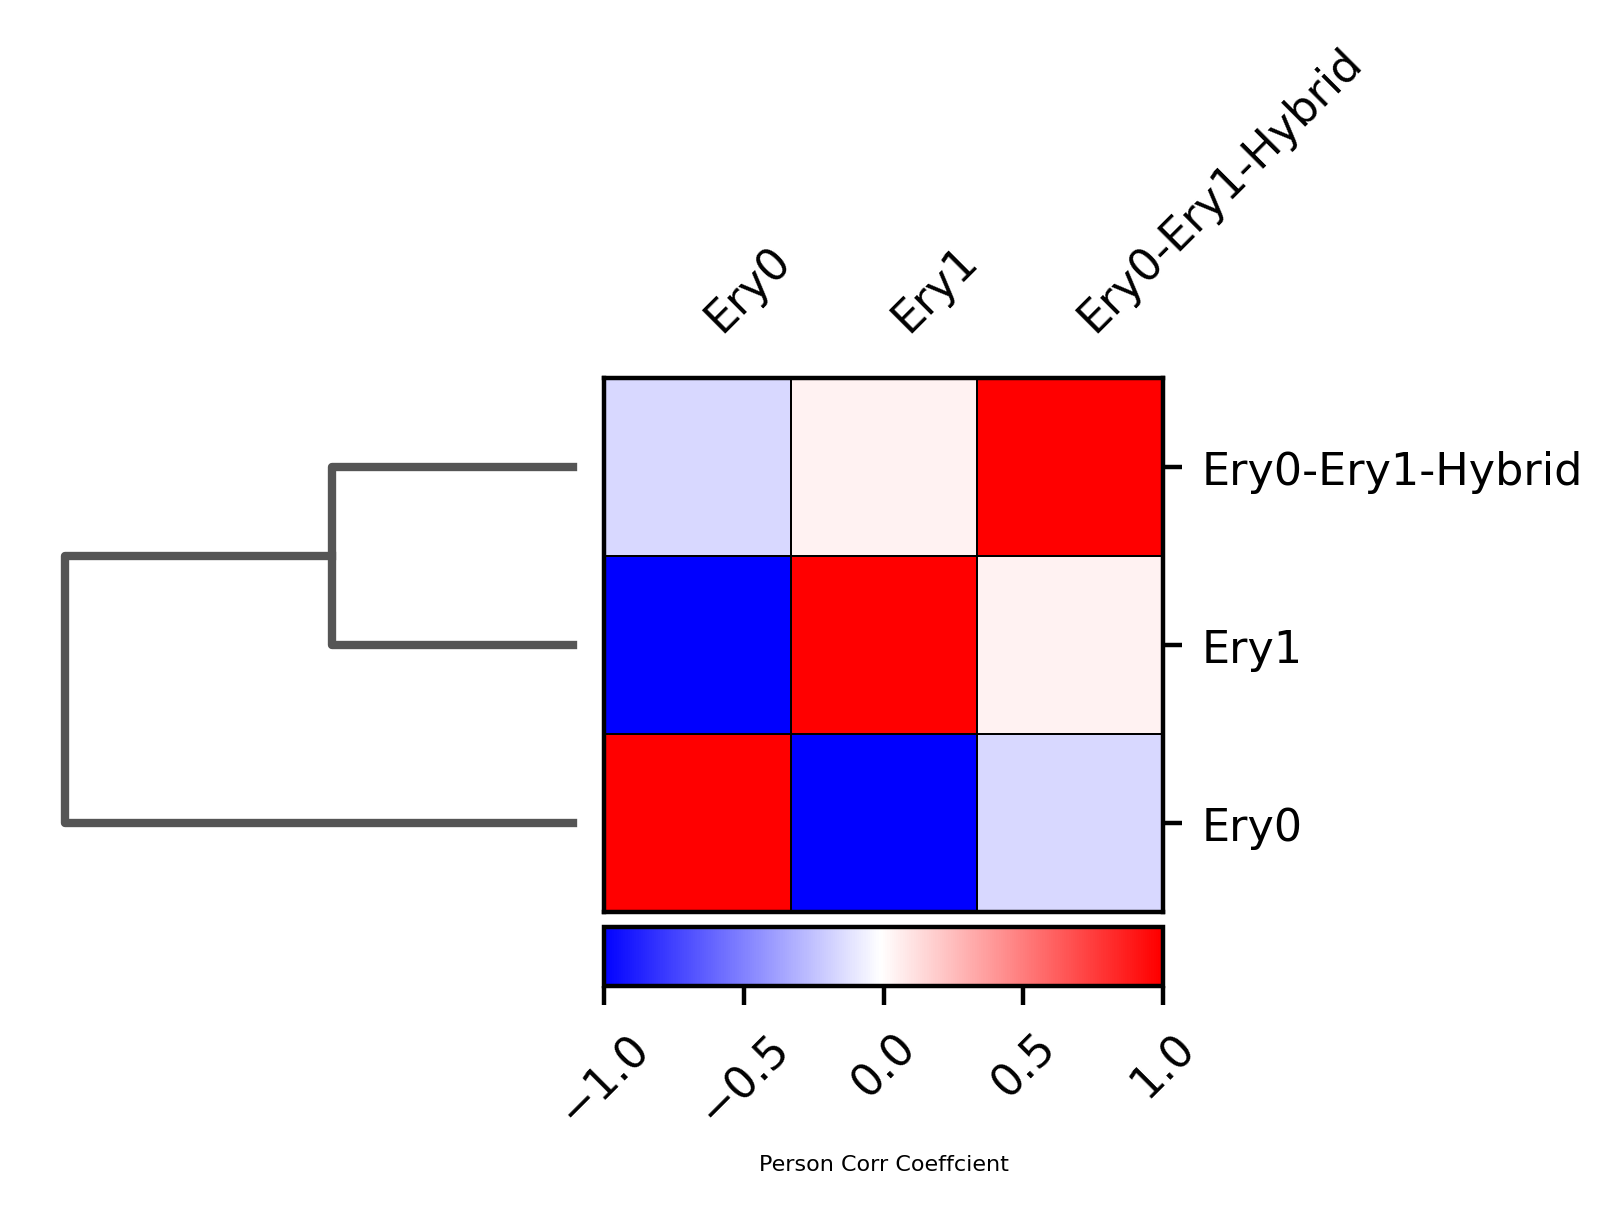

In [51]:
# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (9, 6),
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "axes.labelsize": 2,  # Font size for axis labels
    "axes.titlesize": 4   # Font size for titles
}):
    # Generate the correlation matrix plot
    sc.pl.correlation_matrix(
        filtered_adata,
        groupby="cell_type_w_hybrids",
        show=False  # Do not show the plot immediately
    )

    # Get the current figure and axis
    fig = plt.gcf()
    ax = plt.gca()

    # Customize the plot further using matplotlib
    ax.set_xlabel("Person Corr Coeffcient", fontsize=4)

    # Optionally customize the tick parameters
    ax.tick_params(axis='x', labelsize=8, rotation=45)
    ax.tick_params(axis='y', labelsize=8)

    # Save the plot
    output_plot_path = "./output/DGE/1_Ery0-Ery1-Hybrid/correlation_matrix.png"
    plt.savefig(output_plot_path,bbox_inches='tight')
    plt.show()

In [73]:
filtered_adata.uns.data['dendrogram_cell_type_w_hybrids']

{'linkage': array([[1.        , 2.        , 0.94706955, 2.        ],
        [0.        , 3.        , 1.99534663, 3.        ]]),
 'groupby': ['cell_type_w_hybrids'],
 'use_rep': None,
 'cor_method': 'pearson',
 'linkage_method': 'complete',
 'categories_ordered': ['Ery0', 'Ery1', 'Ery0-Ery1-Hybrid'],
 'categories_idx_ordered': [0, 1, 2],
 'dendrogram_info': {'icoord': [[15.0, 15.0, 25.0, 25.0],
   [5.0, 5.0, 20.0, 20.0]],
  'dcoord': [[0.0, 0.9470695488031486, 0.9470695488031486, 0.0],
   [0.0, 1.9953466325123277, 1.9953466325123277, 0.9470695488031486]],
  'ivl': ['Ery0', 'Ery1', 'Ery0-Ery1-Hybrid'],
  'leaves': [0, 1, 2],
  'color_list': ['C1', 'C0'],
  'leaves_color_list': ['C0', 'C1', 'C1']},
 'correlation_matrix': array([[ 1.        , -0.99534663, -0.14890819],
        [-0.99534663,  1.        ,  0.05293045],
        [-0.14890819,  0.05293045,  1.        ]])}

In [30]:
correlation_matrix = pd.DataFrame(filtered_adata.uns.data['dendrogram_cell_type_w_hybrids']["correlation_matrix"],
             columns=['Ery0', 'Ery1', 'Ery0-Ery1-Hybrid'],
             index=['Ery0', 'Ery1', 'Ery0-Ery1-Hybrid']
            )

correlation_matrix.to_csv("./output/DGE/1_Ery0-Ery1-Hybrid/coorelation_matrix.csv")

In [56]:
sc.pl.correlation_matrix?

Signature:
sc.pl.correlation_matrix(
    adata: anndata._core.anndata.AnnData,
    groupby: str,
    show_correlation_numbers: bool = False,
    dendrogram: Union[bool, str, NoneType] = None,
    figsize: Union[Tuple[float, float], NoneType] = None,
    show: Union[bool, NoneType] = None,
    save: Union[str, bool, NoneType] = None,
    ax: Union[matplotlib.axes._axes.Axes, NoneType] = None,
    vmin: Union[float, NoneType] = None,
    vmax: Union[float, NoneType] = None,
    vcenter: Union[float, NoneType] = None,
    norm: Union[matplotlib.colors.Normalize, NoneType] = None,
    **kwds,
) -> Union[matplotlib.axes._axes.Axes, List[matplotlib.axes._axes.Axes]]
Docstring:
Plots the correlation matrix computed as part of `sc.tl.dendrogram`.

Parameters
----------
adata : AnnData
groupby : str
    Categorical data column used to create the dendrogram
show_correlation_numbers : bool, optional (default: False)
    If `show_correlation=True`, plot the correlation on top of each cell.
dendrog

In [52]:
sc.pl.correlation_matrix?

Signature:
sc.pl.correlation_matrix(
    adata: anndata._core.anndata.AnnData,
    groupby: str,
    show_correlation_numbers: bool = False,
    dendrogram: Union[bool, str, NoneType] = None,
    figsize: Union[Tuple[float, float], NoneType] = None,
    show: Union[bool, NoneType] = None,
    save: Union[str, bool, NoneType] = None,
    ax: Union[matplotlib.axes._axes.Axes, NoneType] = None,
    vmin: Union[float, NoneType] = None,
    vmax: Union[float, NoneType] = None,
    vcenter: Union[float, NoneType] = None,
    norm: Union[matplotlib.colors.Normalize, NoneType] = None,
    **kwds,
) -> Union[matplotlib.axes._axes.Axes, List[matplotlib.axes._axes.Axes]]
Docstring:
Plots the correlation matrix computed as part of `sc.tl.dendrogram`.

Parameters
----------
adata : AnnData
groupby : str
    Categorical data column used to create the dendrogram
show_correlation_numbers : bool, optional (default: False)
    If `show_correlation=True`, plot the correlation on top of each cell.
dendrog